In [2]:
import numpy as np
import pandas as pd

## Question 1

Drawing samples from a bivariate gaussian distribution and calculating sample kurtosis and skewness

In [26]:
cov = np.array([
    [9, 2],
    [2, 3],
])
mean = np.array([1, 0])

from numpy.random import default_rng
rng = default_rng(seed=10)
samples = pd.DataFrame(rng.multivariate_normal(mean, cov, 15))

In [27]:
print(samples.to_latex())

\begin{tabular}{lrr}
\toprule
{} &         0 &         1 \\
\midrule
0  &  4.597941 & -0.082831 \\
1  &  3.199353 &  1.097550 \\
2  &  1.680648 &  0.410578 \\
3  & -1.885425 &  0.513452 \\
4  & -0.207406 & -1.094364 \\
5  &  3.604727 & -0.528722 \\
6  &  2.043016 &  0.232730 \\
7  &  4.392772 & -0.806960 \\
8  &  0.923505 & -3.016915 \\
9  &  1.334248 &  0.789666 \\
10 &  4.421921 & -0.763320 \\
11 &  2.965662 &  1.642863 \\
12 &  2.223469 & -2.652278 \\
13 &  1.801136 &  1.881806 \\
14 & -2.200512 &  0.049598 \\
\bottomrule
\end{tabular}



In [32]:
samples.cov(ddof=0)

,0,1
0,4.174261,-0.017701
1,-0.017701,1.803360


In [33]:
samples.cov(ddof=1)

,0,1
0,4.472423,-0.018965
1,-0.018965,1.932172


In [36]:
samples.mean()

0    1.926337
1   -0.155143
dtype: float64

5.930160172805587

In [ ]:
deviations = (samples - samples.mean()).to_numpy()
S = samples.cov(ddof=0).to_numpy()
S_inv = np.linalg.inv(S)
(((deviations @ S_inv @ deviations.T).diagonal()) ** 2).sum() / deviations.shape[0]
# pd.DataFrame(deviations.T)

In [28]:
samples.describe()

,0,1
count,15.000000,15.000000
mean,1.926337,-0.155143
std,2.114810,1.390026
min,-2.200512,-3.016915
25%,1.128877,-0.785140
50%,2.043016,0.049598
75%,3.402040,0.651559
max,4.597941,1.881806


In [57]:
samples.kurtosis()

0   -0.135089
1    0.302343
dtype: float64

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

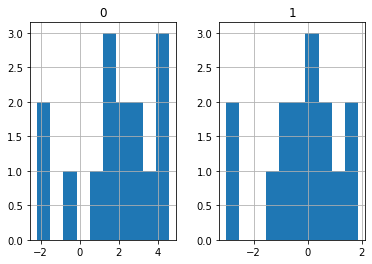

In [29]:
samples.hist()

<AxesSubplot:xlabel='0', ylabel='1'>

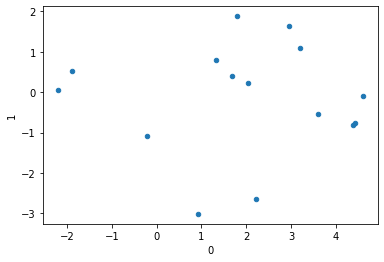

In [30]:
samples.plot.scatter(0, 1)

# Question 5
Drawing samples from Poisson distribution

In [135]:
from scipy.stats import poisson
dist = poisson
dist.random_state = np.random.RandomState(seed=200)
a = dist.rvs(20, size=20)

In [136]:
print(pd.Series(a).to_latex(index=None))

\begin{tabular}{r}
\toprule
  0 \\
\midrule
 30 \\
 21 \\
 24 \\
 18 \\
 28 \\
 25 \\
 24 \\
 25 \\
 26 \\
 19 \\
 19 \\
 21 \\
 22 \\
 34 \\
 22 \\
 15 \\
 22 \\
 25 \\
 16 \\
 22 \\
\bottomrule
\end{tabular}



In [137]:
m1 = a.mean()
m2 = (a**2).mean()
m3 = (a**3).mean()

In [138]:
print("Sample Moments:")
print(f"m1 = {m1}")
print(f"m2 = {m2}")
print(f"m3 = {m3}")

Sample Moments:
m1 = 22.9
m2 = 544.4
m3 = 13424.5


In [139]:
print(f"Estimate 1: {m1}")
print(f"Estimate 2: {np.sqrt(m2 - m1)}")

Estimate 1: 22.9
Estimate 2: 22.83637449333847


In [140]:
def f(l):
    return 100 * (a.mean() - l)**2 + 10 * ((a**2).mean() - l**2 -l)**2 + ((a**3).mean() - l**3 - 3*l**2 - l)**2

In [141]:
from scipy.optimize import minimize
minimize(f, 0)

      fun: 42.39296682167475
 hess_inv: array([[1.72413686e-07]])
      jac: array([4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 12
   status: 0
  success: True
        x: array([22.79433678])